# Boston House Price Prediction

# Import Library

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Dataset of Boston

In [2]:
# Read Data
data=pd.read_csv("housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#Dependent Data
price=data["MEDV"]   # Medv(median value of owner-occupied homes in $1000s.)
price.shape

(506,)

In [4]:
#Independent data
feature=data[["RM","LSTAT","PTRATIO"]]
feature

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
5,6.430,5.21,18.7
6,6.012,12.43,15.2
7,6.172,19.15,15.2
8,5.631,29.93,15.2
9,6.004,17.10,15.2


In [5]:
print("Bostan housing dataset has {} data points with {} variables each.".format(*data.shape))

Bostan housing dataset has 506 data points with 14 variables each.


# Statistics

In [6]:
# Statistics of Price
prices_description=price.describe()
print(prices_description)
print("\n")

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64




# Taking RM (Average number of room per dwelling)

In [7]:
# Taking RM as feature
a=np.array(feature['RM'])
rm=a.reshape(-1,1)
print(rm)
rm.shape

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

(506, 1)

In [8]:
# Applying tain_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(rm,price,test_size=.2,random_state=42)

In [9]:
x_train.shape

(404, 1)

In [10]:
y_train.shape

(404,)

In [11]:
# Linear Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# prediction of price on the basis of RM
y_pred=regressor.predict(x_test)
y_pred.shape

(102,)

<function matplotlib.pyplot.show(*args, **kw)>

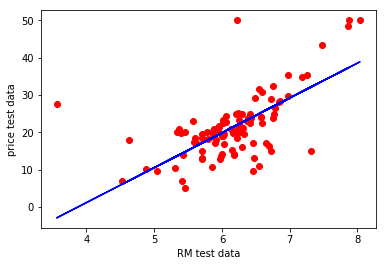

In [13]:
# Visualization of RM and Price predicted data for testing
plt.scatter(x_test,y_test,color="r")
plt.xlabel("RM test data")
plt.ylabel("price test data")
plt.plot(x_test,y_pred,color="Blue")
plt.show

In [14]:
y_test.shape

(102,)

In [15]:
y_pred.shape

(102,)

In [16]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.3707569232254778


# Taking LSTAT (percentage lower status of the population)

In [17]:
# Taking LSTAT as feature
a=np.array(feature['LSTAT'])
Lstat=a.reshape(-1,1)
print(Lstat)
Lstat.shape

[[ 4.98]
 [ 9.14]
 [ 4.03]
 [ 2.94]
 [ 5.33]
 [ 5.21]
 [12.43]
 [19.15]
 [29.93]
 [17.1 ]
 [20.45]
 [13.27]
 [15.71]
 [ 8.26]
 [10.26]
 [ 8.47]
 [ 6.58]
 [14.67]
 [11.69]
 [11.28]
 [21.02]
 [13.83]
 [18.72]
 [19.88]
 [16.3 ]
 [16.51]
 [14.81]
 [17.28]
 [12.8 ]
 [11.98]
 [22.6 ]
 [13.04]
 [27.71]
 [18.35]
 [20.34]
 [ 9.68]
 [11.41]
 [ 8.77]
 [10.13]
 [ 4.32]
 [ 1.98]
 [ 4.84]
 [ 5.81]
 [ 7.44]
 [ 9.55]
 [10.21]
 [14.15]
 [18.8 ]
 [30.81]
 [16.2 ]
 [13.45]
 [ 9.43]
 [ 5.28]
 [ 8.43]
 [14.8 ]
 [ 4.81]
 [ 5.77]
 [ 3.95]
 [ 6.86]
 [ 9.22]
 [13.15]
 [14.44]
 [ 6.73]
 [ 9.5 ]
 [ 8.05]
 [ 4.67]
 [10.24]
 [ 8.1 ]
 [13.09]
 [ 8.79]
 [ 6.72]
 [ 9.88]
 [ 5.52]
 [ 7.54]
 [ 6.78]
 [ 8.94]
 [11.97]
 [10.27]
 [12.34]
 [ 9.1 ]
 [ 5.29]
 [ 7.22]
 [ 6.72]
 [ 7.51]
 [ 9.62]
 [ 6.53]
 [12.86]
 [ 8.44]
 [ 5.5 ]
 [ 5.7 ]
 [ 8.81]
 [ 8.2 ]
 [ 8.16]
 [ 6.21]
 [10.59]
 [ 6.65]
 [11.34]
 [ 4.21]
 [ 3.57]
 [ 6.19]
 [ 9.42]
 [ 7.67]
 [10.63]
 [13.44]
 [12.33]
 [16.47]
 [18.66]
 [14.09]
 [12.27]
 [15.55]
 [13.  ]
 

(506, 1)

In [18]:
# Applying tain_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Lstat,price,test_size=.2,random_state=42)

In [19]:
# Linear Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# prediction of price on the basis of RM
y_pred=regressor.predict(x_test)
y_pred.shape

(102,)

<function matplotlib.pyplot.show(*args, **kw)>

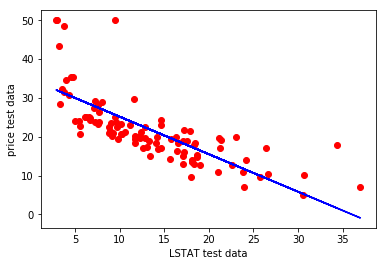

In [21]:
# Visualization of RM and Price predicted data for testing
plt.scatter(x_test,y_test,color="r")
plt.xlabel("LSTAT test data")
plt.ylabel("price test data")
plt.plot(x_test,y_pred,color="Blue")
plt.show

In [22]:
y_test.shape

(102,)

In [23]:
y_pred.shape

(102,)

In [24]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.5429180422970386


# Take PTRATIO (pupil-teacher ratio by town)

In [25]:
# Taking PTRATIO as feature
a=np.array(feature['PTRATIO'])
ptratio=a.reshape(-1,1)
print(ptratio)
ptratio.shape

[[15.3]
 [17.8]
 [17.8]
 [18.7]
 [18.7]
 [18.7]
 [15.2]
 [15.2]
 [15.2]
 [15.2]
 [15.2]
 [15.2]
 [15.2]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [19.2]
 [19.2]
 [19.2]
 [19.2]
 [18.3]
 [18.3]
 [17.9]
 [17.9]
 [17.9]
 [17.9]
 [17.9]
 [17.9]
 [17.9]
 [17.9]
 [17.9]
 [16.8]
 [16.8]
 [16.8]
 [16.8]
 [21.1]
 [17.9]
 [17.3]
 [15.1]
 [19.7]
 [19.7]
 [19.7]
 [19.7]
 [19.7]
 [19.7]
 [18.6]
 [16.1]
 [16.1]
 [18.9]
 [18.9]
 [18.9]
 [19.2]
 [19.2]
 [19.2]
 [19.2]
 [18.7]
 [18.7]
 [18.7]
 [18.7]
 [18.7]
 [18.7]
 [19. ]
 [19. ]
 [19. ]
 [19. ]
 [18.5]
 [18.5]
 [18.5]
 [18.5]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [18.2]
 [18.2]
 [18.2]
 [18. ]
 [18. ]
 [18. ]
 [18. ]
 [18. ]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [19.1]
 [19.1]
 [19.1]
 [19.1]
 [19.1]


(506, 1)

In [26]:
# Applying tain_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ptratio,price,test_size=.2,random_state=42)

In [27]:
# Linear Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# prediction of price on the basis of RM
y_pred=regressor.predict(x_test)
y_pred.shape

(102,)

<function matplotlib.pyplot.show(*args, **kw)>

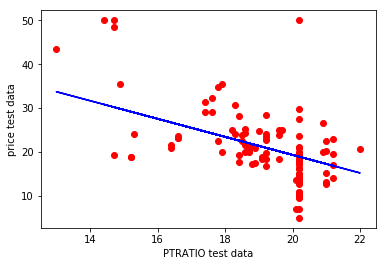

In [29]:
# Visualization of RM and Price predicted data for testing
plt.scatter(x_test,y_test,color="r")
plt.xlabel("PTRATIO test data")
plt.ylabel("price test data")
plt.plot(x_test,y_pred,color="Blue")
plt.show

In [30]:
y_test.shape

(102,)

In [31]:
y_pred.shape

(102,)

In [32]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.3185081182082454


# Implement by Linear Regression

In [33]:
# Applying tain_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature,price,test_size=.2,random_state=42)

In [34]:
# Linear Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
x_train.head()

,RM,LSTAT,PTRATIO
477,5.304,24.91,20.2
15,5.834,8.47,21.0
332,6.031,7.83,16.9
423,6.103,23.29,20.2
19,5.727,11.28,21.0


In [36]:
# prediction of price on the basis of RM
y_pred=regressor.predict(x_test)
y_pred.shape
y_pred

array([26.71839575, 30.66329109, 16.42637714, 24.72870795, 18.34236753,
       22.55998071, 17.41260032, 12.96100189, 20.50226937, 19.54487043,
       19.56183682, 21.32884903, -1.60676806, 22.11828757, 19.0932238 ,
       24.89326357, 17.05831926,  3.78100828, 39.265878  , 17.30213002,
       25.50543582, 27.22606969, 11.74496965, 23.41905147, 17.79721773,
       13.55715504, 22.18971906, 19.65188027, 18.06725825, 18.5258928 ,
       19.35058262, 25.20995429, 25.52650792, 17.74515312, 14.59517091,
       21.05006139, 32.31275073, 20.46742322, 20.06050112, 24.47107497,
       12.54034677, 28.15002552, 39.84115673, 18.3721947 , 25.81325411,
       15.55216655, 14.09605723, 25.78461455, 18.25684551, 30.93251583,
       23.52560675, 33.43924834, 16.06172585, 25.56743896, 38.37414381,
       22.21043646, 18.3432299 , 29.89747585, 24.60878851, 15.20757406,
       25.47638306, 32.09940265, 29.6900487 , 16.66450161, 28.06172984,
       11.72778471, 19.28579901, 25.39072489, 28.80419702, 15.77

In [39]:
from sklearn.metrics import r2_score
lr=r2_score(y_test,y_pred)
print(lr)

0.6302528487272828


# Implement By Random Forest

In [40]:
# Applying tain_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature,price,test_size=.2,random_state=4)

In [41]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
# Model prediction on train data
y_pred = reg.predict(x_test)

In [43]:
# Model Evaluation
from sklearn import metrics
Rnf=metrics.r2_score(y_test, y_pred)
print('R^2:',Rnf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7674807967707687
Adjusted R^2: 0.7603628619780372
MAE: 2.846764705882353
MSE: 21.59852843137255
RMSE: 4.6474216971749565


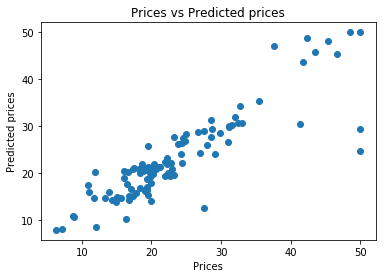

In [44]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

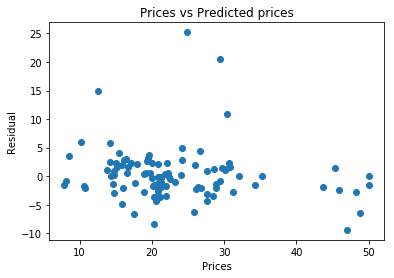

In [45]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_pred, y_test-y_pred)
plt.xlabel("Prices")
plt.ylabel("Residual")
plt.title("Prices vs Predicted prices")
plt.show()

# Implement by SVM 

In [46]:
# Applying tain_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature,price,test_size=.2,random_state=4)

In [48]:
#Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [49]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [50]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
# Model prediction on train data
y_pred = reg.predict(X_test)

In [52]:
# Model Evaluation
sm=metrics.r2_score(y_test, y_pred)
print('R^2:',sm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.6956542293562565
Adjusted R^2: 0.6863375220916521
MAE: 3.2740047632290947
MSE: 28.270442565281
RMSE: 5.316995633370503


In [53]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines'],
    'R-squared Score': [lr*100, Rnf*100, sm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,76.748080
2,Support Vector Machines,69.565423
0,Linear Regression,63.025285
